<a href="https://colab.research.google.com/github/brianna-phsx/plotting-templates/blob/main/PHSXlab_plotting_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

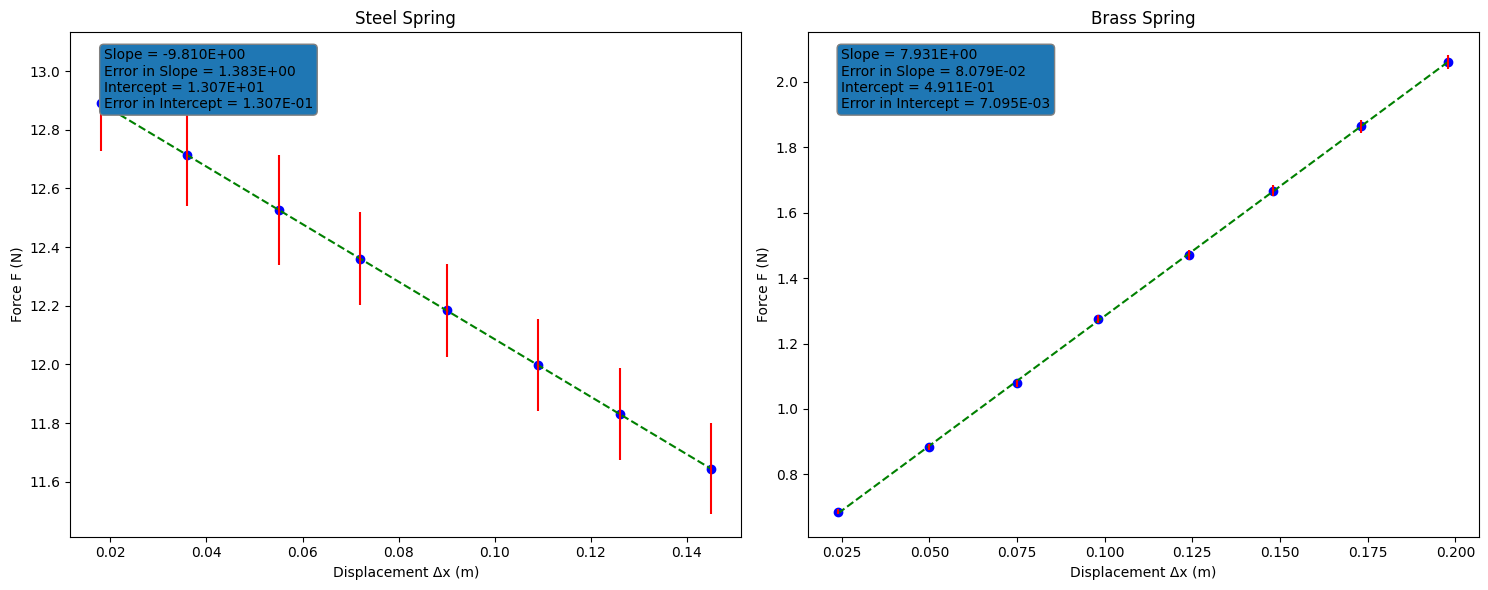

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Steel Spring Data
x1 = np.array([0.0179999999999998,
0.0359999999999998,
0.0549999999999997,
0.0719999999999998,
0.0899999999999999,
0.109,
0.126,
0.145,
]) #Delta X (M)
y1 = np.array([12.89034,
12.71376,
12.52737,
12.3606,
12.18402,
11.99763,
11.83086,
11.64447,
]) #Force of Spring (N)
dy1 = np.array([0.164011984714338,
0.175112071564625,
0.18756159372765,
0.159715800811441,
0.158298789547828,
0.156811593066827,
0.155488578117469,
0.154018684197964,

]) #Error Force (M)

# Brass Spring  Data
x2 = np.array([0.024,
0.05,
0.075,
0.0980000000000001,
0.124,
0.148,
0.173,
0.198,
])  # Delta x (M)
y2 = np.array([0.6867,
0.8829,
1.0791,
1.2753,
1.4715,
1.6677,
1.8639,
2.0601,
])  # Force of Brass Spring (N)
dy2 = np.array([0.00700278716083818,
0.00900323446878954,
0.0110037372969369,
0.0130042700225734,
0.0150048206873658,
0.01700538296011,
0.0190059531752554,
0.0210065290636031,
])  # Error in Force

# Define function for linear fit and error calculation
def linear_fit_and_plot(x, y, dy, subplot, title):
    b, m = np.polynomial.polynomial.polyfit(x, y, 1, w=dy)
    fit = b + m * x
    
    def Delta(x, dy):
        D = (sum(1/dy**2)) * (sum(x**2/dy**2)) - (sum(x/dy**2))**2
        return D
    
    D = Delta(x, dy)
    dm = np.sqrt(1/D * sum(1/dy**2))  # error in slope
    db = np.sqrt(1/D * sum(x**2/dy**2))  # error in intercept
    
    # Plot in designated subplot
    ax = plt.subplot(1, 2, subplot)
    ax.plot(x, fit, color='green', linestyle='--')
    ax.scatter(x, y, color='blue', marker='o')
    ax.errorbar(x, y, yerr=dy, fmt='none', ecolor='red')
    ax.set_title(title)
    ax.set_xlabel('Displacement Δx (m)')
    ax.set_ylabel('Force F (N)')
    
    # Annotate plot with slope and intercept values
    ax.annotate(f'Slope = {m:.3E}\nError in Slope = {dm:.3E}\nIntercept = {b:.3E}\nError in Intercept = {db:.3E}',
                xy=(0.05, 0.85), xycoords='axes fraction', fontsize=10, bbox=dict(boxstyle="round,pad=0.3", edgecolor='gray'))

# Create figure and plot for both springs
plt.figure(figsize=(15, 6))
linear_fit_and_plot(x1, y1, dy1, 1, 'Steel Spring')
linear_fit_and_plot(x2, y2, dy2, 2, 'Brass Spring')
plt.tight_layout()
plt.show()